In [1]:
# basic
import pandas as pd
import numpy as np

# for plot
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data with Pandas
## breast cancer
The breast cancer dataset is a classic and very easy binary classification dataset.

As such it is a classification problem. It is a good dataset for demonstration because all of the input attributes are numeric and the output variable to be predicted is binary (0 or 1).

In [2]:
# Load the data
breast_cancer = load_breast_cancer()
data = breast_cancer.data # data
print("Shape of breast cancer data", data.shape)
labels = breast_cancer.target
print("Shape of breast cancer labels", labels.shape)

# concatenate the data and labels along the second axis
labels = np.reshape(labels,(569,1))
data_and_label = np.concatenate([data, labels], axis=1)

# read in pandas DataFrame
df = pd.DataFrame(data_and_label)

# Append feature/column names
features_names = np.append(breast_cancer.feature_names, 'label')
df.columns = features_names

# Replace label with taget names
print("Classification Targets", breast_cancer.target_names)
df['label'].replace(0, 'Benign', inplace=True)
df['label'].replace(1, 'Malignant', inplace=True)

# show the first 6 rows of data
df.head(6)

Shape of breast cancer data (569, 30)
Shape of breast cancer labels (569,)
Classification Targets ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,Benign


In [3]:
print(df.shape) # dimension
print(df.columns) # feature/column names
print(df.dtypes) # data tpye

(569, 31)
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float6

## Descriptive Statistics

The describe() function on the Pandas DataFrame lists 8 statistical properties of each attribute. They are: Count, Mean, Standard Deviation, Minimum Value, 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value.

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Class Distribution (Classification Only)

class 0 (no onset of diabetes) and class 1 (onset of diabetes)

In [5]:
class_counts = df.groupby('label').size()
print(class_counts)

label
Benign       212
Malignant    357
dtype: int64


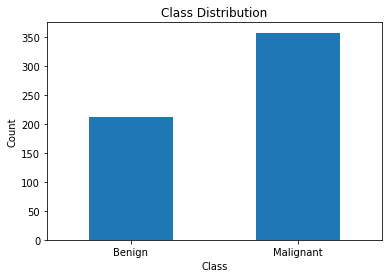

In [6]:
class_counts.plot.bar()
plt.title("Class Distribution")
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
plt.close()

## Correlations Between Attributes
Correlation refers to the relationship between two variables and how they may or may not change together. The most common method for calculating correlation is Pearson’s Correlation Coefficient, that assumes a normal distribution of the attributes involved. 

A correlation of -1 or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no correlation at all. Some machine learning algorithms like linear and logistic regression can suffer poor performance if there are highly correlated attributes in the dataset. As such, it is a good idea to review all of the pairwise correlations of the attributes in the dataset.

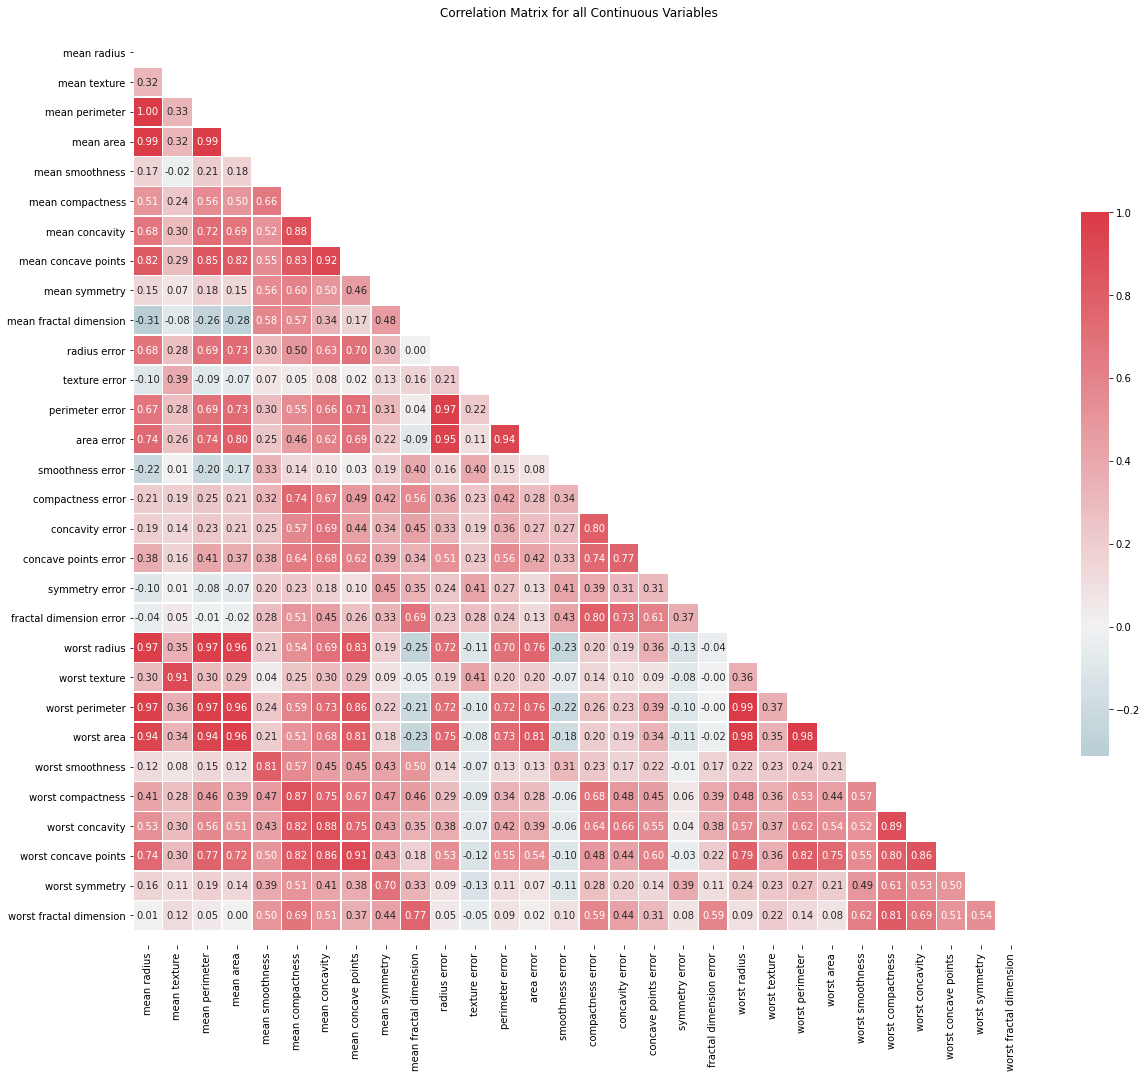

In [7]:
# Compute the correlation matrix
corr = df.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt='.2f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Matrix for all Continuous Variables')
plt.show()
plt.close()

## Skew of Univariate Distributions
The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.

In [8]:
df.skew()

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

## Histograms and Density Plots

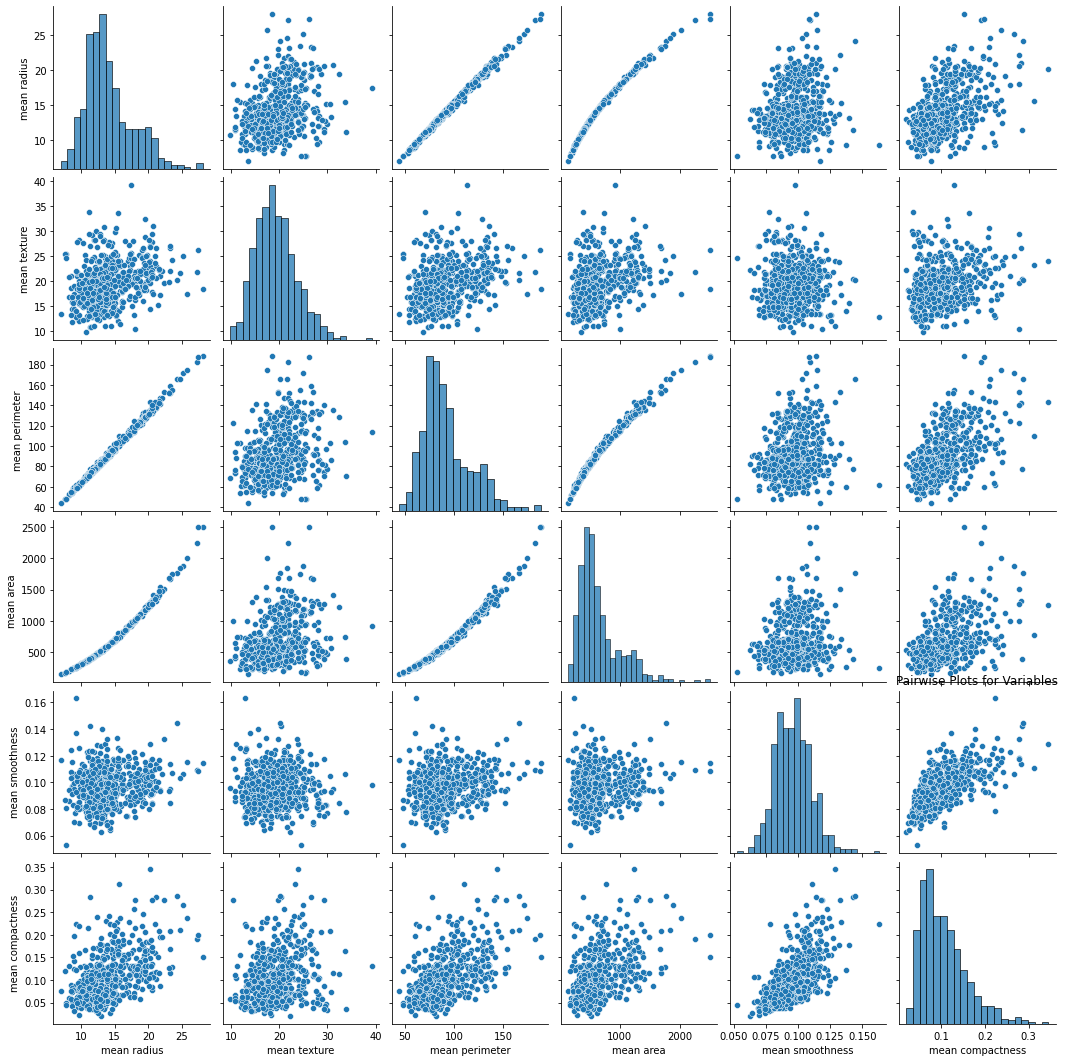

In [9]:
# plot pairwise plot for the first 6 features
sns.pairplot(df.iloc[:, : 6])
plt.title('Pairwise Plots for Variables')
plt.show()
plt.close()

In [10]:
df.values

array([[17.99, 10.38, 122.8, ..., 0.4601, 0.1189, 'Benign'],
       [20.57, 17.77, 132.9, ..., 0.275, 0.08902, 'Benign'],
       [19.69, 21.25, 130.0, ..., 0.3613, 0.08758, 'Benign'],
       ...,
       [16.6, 28.08, 108.3, ..., 0.2218, 0.0782, 'Benign'],
       [20.6, 29.33, 140.1, ..., 0.4087, 0.124, 'Benign'],
       [7.76, 24.54, 47.92, ..., 0.2871, 0.07039, 'Malignant']],
      dtype=object)

## Principal Component Analysis (PCA)
Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form. 
Generally this is called a dimensional reduction technique. 
A property of PCA is that you can choose the number of dimensions or principal components in the transformed result.

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Transformation of the data onto unit scale (mean=0 and variance=1) is a requirement for the optimal performance of many machine learning algorithms.

In [11]:
# get array of features and label
array = df.values
X = array[:,0:30] # features
y = array[:,30] # label
# standardize data (0 mean, 1 stdev)
X = StandardScaler().fit_transform(X)
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [12]:
# feature extraction
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

# summarize components
print(pca.components_)
print(("Explained Variance: %s") % pca.explained_variance_ratio_)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]
Explained Variance: [0.44272026 0.18971182]


From the above output, we can observe that the principal component 1 holds 44.2% of the information while the principal component 2 holds only 19% of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost.

In [13]:
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

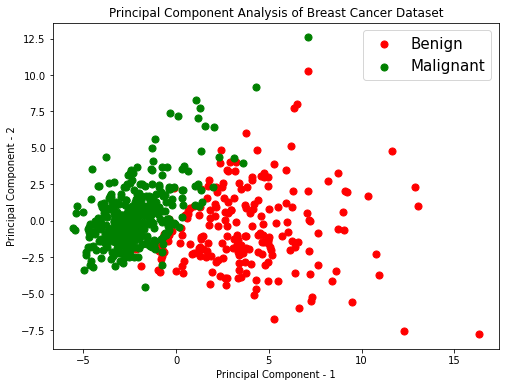

In [14]:
fig = plt.figure(figsize = (8,6))
plt.xlabel('Principal Component - 1')
plt.ylabel('Principal Component - 2')
plt.title("Principal Component Analysis of Breast Cancer Dataset")
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = df['label'] == target
    plt.scatter(principalDf.loc[indicesToKeep, 'principal component 1'], 
                principalDf.loc[indicesToKeep, 'principal component 2'], 
                c = color, s = 50)
plt.legend(targets,prop={'size': 15})
plt.show()
plt.close()

From the above graph, we can observe that the two classes benign and malignant, when projected to a two-dimensional space, can be linearly separable up to some extent. Other observations can be that the benign class is spread out as compared to the malignant class.

### limitations of PCA
- PCA is not scale invariant. We need to scale our data first.
- The directions with largest variance are assumed to be of the most interest.
- Only considers orthogonal transformations (rotations) of the original variables.
- PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this, but some are not.
- If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances.